In [ ]:
# import sys
# #sys.path.insert(0,'../input/dlibpkg/dlib-19.19.0/')
# sys.path.insert(0,'../input/imutils/imutils-0.5.3/')

In [ ]:
# !pip install dlib

In [ ]:
# import dlib
# from scipy.spatial import distance as dist
# from imutils.video import FileVideoStream
# from imutils.video import VideoStream
# from imutils import face_utils
# import numpy as np
# import imutils
# import time
# import cv2

In [ ]:
# def eye_aspect_ratio(eye):
#     # compute the euclidean distances between the two sets of vertical eye landmarks (x, y)-coordinates
#     A = dist.euclidean(eye[1], eye[5])
#     B = dist.euclidean(eye[2], eye[4])
#     # compute the euclidean distance between the horizontal-eye landmark (x, y)-coordinates
#     C = dist.euclidean(eye[0], eye[3])
#     ear = (A + B) / (2.0 * C)
#     return ear
 
# # define two constants, one for the eye aspect ratio to indicate
# # blink and then a second constant for the number of consecutive
# # frames the eye must be below the threshold
# EYE_AR_THRESH = 0.3
# EYE_AR_CONSEC_FRAMES = 3
# # initialize the frame counters and the total number of blinks
# COUNTER = 0
# TOTAL = 0
# print("[INFO] loading facial landmark predictor...")
# detector  = dlib.get_frontal_face_detector()
# dlib_path = '../input/face-det/shape_predictor_68_face_landmarks.dat'
# predictor = dlib.shape_predictor(dlib_path)

In [ ]:
# # loop over frames from the video stream and grab the indexes of the facial landmarks for the left and right eye, respectively
# (lStart, lEnd) = face_utils.FACIAL_LANDMARKS_IDXS["left_eye"]
# (rStart, rEnd) = face_utils.FACIAL_LANDMARKS_IDXS["right_eye"]
# # start the video stream thread
# print("[INFO] starting video stream thread..................")
# video_path = '../input/deepfake-detection-challenge/train_sample_videos/dkzvdrzcnr.mp4'
# vs = FileVideoStream(video_path).start()
# fileStream = True
# time.sleep(1.0)

# while True:
#     if fileStream and not vs.more():
#         break
#     frame = vs.read()
#     print(frame.shape)
#     frame = imutils.resize(frame, width=450)
#     print("after")
#     gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

#     # detect faces in the grayscale frame
#     rects = detector(gray, 0)
#     print(rects)
#     # loop over the face detections
#     for rect in rects:
#         # determine the facial landmarks for the face region, then convert the facial landmark (x, y)-coordinates to a NumPy array
#         shape = predictor(gray, rect)
#         shape = face_utils.shape_to_np(shape)
#         # extract the left and right eye coordinates, then use the
#         # coordinates to compute the eye aspect ratio for both eyes
#         leftEye = shape[lStart:lEnd]
#         rightEye = shape[rStart:rEnd]
#         leftEAR = eye_aspect_ratio(leftEye)
#         rightEAR = eye_aspect_ratio(rightEye)
#         # average the eye aspect ratio together for both eyes
#         ear = (leftEAR + rightEAR) / 2.0
#         print("ear")
#         # compute the convex hull for the left and right eye, then
#         # visualize each of the eyes
#         leftEyeHull = cv2.convexHull(leftEye)
#         rightEyeHull = cv2.convexHull(rightEye)
#         cv2.drawContours(frame, [leftEyeHull], -1, (0, 255, 0), 1)
#         cv2.drawContours(frame, [rightEyeHull], -1, (0, 255, 0), 1)

#         # check to see if the eye aspect ratio is below the blink
#         # threshold, and if so, increment the blink frame counter
#         if ear < EYE_AR_THRESH:
#             COUNTER += 1

#         # otherwise, the eye aspect ratio is not below the blink
#         # threshold
#         else:
#             # if the eyes were closed for a sufficient number of
#             # then increment the total number of blinks
#             if COUNTER >= EYE_AR_CONSEC_FRAMES:
#                 TOTAL += 1

#             # reset the eye frame counter
#             COUNTER = 0

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from tqdm import tqdm,trange
from sklearn.model_selection import train_test_split
import sklearn.metrics

import torch
import torch.nn as nn
import torch.nn.functional as F

import warnings
warnings.filterwarnings("ignore")

# Setup Data

In [2]:
#----------Training data set
df_train0 = pd.read_json('../input/deepfake/metadata0.json')
df_train1 = pd.read_json('../input/deepfake/metadata1.json')
df_train2 = pd.read_json('../input/deepfake/metadata2.json')
df_train3 = pd.read_json('../input/deepfake/metadata3.json')
df_train4 = pd.read_json('../input/deepfake/metadata4.json')
df_train5 = pd.read_json('../input/deepfake/metadata5.json')
df_train6 = pd.read_json('../input/deepfake/metadata6.json')
df_train7 = pd.read_json('../input/deepfake/metadata7.json')
df_train8 = pd.read_json('../input/deepfake/metadata8.json')
df_train9 = pd.read_json('../input/deepfake/metadata9.json')
df_train10 = pd.read_json('../input/deepfake/metadata10.json')
df_train11 = pd.read_json('../input/deepfake/metadata11.json')
df_train12 = pd.read_json('../input/deepfake/metadata12.json')
df_train13 = pd.read_json('../input/deepfake/metadata13.json')
df_train14 = pd.read_json('../input/deepfake/metadata14.json')
df_train15 = pd.read_json('../input/deepfake/metadata15.json')
df_train16 = pd.read_json('../input/deepfake/metadata16.json')
df_train17 = pd.read_json('../input/deepfake/metadata17.json')
df_train18 = pd.read_json('../input/deepfake/metadata18.json')
df_train19 = pd.read_json('../input/deepfake/metadata19.json')
df_train20 = pd.read_json('../input/deepfake/metadata20.json')
df_train21 = pd.read_json('../input/deepfake/metadata21.json')
df_train22 = pd.read_json('../input/deepfake/metadata22.json')
df_train23 = pd.read_json('../input/deepfake/metadata23.json')
df_train24 = pd.read_json('../input/deepfake/metadata24.json')
df_train25 = pd.read_json('../input/deepfake/metadata25.json')
df_train26 = pd.read_json('../input/deepfake/metadata26.json')
df_train27 = pd.read_json('../input/deepfake/metadata27.json')
df_train28 = pd.read_json('../input/deepfake/metadata28.json')
df_train29 = pd.read_json('../input/deepfake/metadata29.json')
df_train30 = pd.read_json('../input/deepfake/metadata30.json')
df_train31 = pd.read_json('../input/deepfake/metadata31.json')
df_train32 = pd.read_json('../input/deepfake/metadata32.json')
df_train33 = pd.read_json('../input/deepfake/metadata33.json')
df_train34 = pd.read_json('../input/deepfake/metadata34.json')
df_train35 = pd.read_json('../input/deepfake/metadata35.json')
df_train36 = pd.read_json('../input/deepfake/metadata36.json')
df_train37 = pd.read_json('../input/deepfake/metadata37.json')
df_train38 = pd.read_json('../input/deepfake/metadata38.json')
df_train39 = pd.read_json('../input/deepfake/metadata39.json')
df_train40 = pd.read_json('../input/deepfake/metadata40.json')
df_train41 = pd.read_json('../input/deepfake/metadata41.json')
df_train42 = pd.read_json('../input/deepfake/metadata42.json')
df_train43 = pd.read_json('../input/deepfake/metadata43.json')
df_train44 = pd.read_json('../input/deepfake/metadata44.json')
df_train45 = pd.read_json('../input/deepfake/metadata45.json')
df_train46 = pd.read_json('../input/deepfake/metadata46.json')
df_train = [df_train0 ,df_train1, df_train2, df_train3, df_train4,
             df_train5, df_train6, df_train7, df_train8, df_train9,df_train10,
            df_train11, df_train12, df_train13, df_train14, df_train15,df_train16, 
            df_train17, df_train18, df_train19, df_train20, df_train21, df_train22, 
            df_train23, df_train24, df_train25, df_train26, df_train27, df_train28, 
            df_train29, df_train30, df_train31, df_train32, df_train33, df_train34,
            df_train35, df_train36, df_train37, df_train38, df_train39,
            df_train40, df_train41, df_train42, df_train43, df_train44, df_train45,
            df_train46]
train_nums = ["%.2d" % i for i in range(len(df_train)+1)]
#--------------Validation data set
df_val1 = pd.read_json('../input/deepfake/metadata47.json')
df_val2 = pd.read_json('../input/deepfake/metadata48.json')
df_val3 = pd.read_json('../input/deepfake/metadata49.json')
df_val = [df_val1, df_val2, df_val3]
val_nums =['47', '48', '49']

In [ ]:
# def get_all_paths(df_list,suffixes_list):
#     LABELS = {'REAL':0,'FAKE':1}
#     paths  = []
#     labels = []
#     for df,suffix in tqdm(zip(df_list,suffixes_list),total=len(df_list)):
#         images_names = list(df.columns.values)
#         for img_name in images_names:
#             try:
#                 paths.append(get_path(img_name,suffix))
#                 labels.append(LABELS[df[img_name]['label']])
#             except Exception as err:
#                 #print(err)
#                 pass
#     return paths,labels

In [3]:
def get_orig_fakes(df):
    orig_fakes = {}
    temp = df.T.groupby(['original',df.T.index,]).count()
    for orig,fake in (list(temp.index)):
        fakes = []
        try:#if key exists
            fakes = orig_fakes[orig]
            fakes.append(fake)
        except KeyError as e:
            fakes.append(fake)
        finally:
            orig_fakes[orig] = fakes
    return orig_fakes

def get_path(img_name,suffix):
    path = '../input/deepfake/DeepFake'+suffix+'/DeepFake'+suffix+'/' + img_name.replace(".mp4","")+ '.jpg'
    if not os.path.exists(path):
        raise Exception
    return path

def get_all_paths(df_list,suffixes_list):
    paths  = []
    labels = []
    count = 0
    for df in tqdm(df_list,total=len(df_list)):
        orig_fakes = get_orig_fakes(df)
        for suffix in suffixes_list:
            try:
                for orig,fakes in orig_fakes.items():
                    paths.append(get_path(orig,suffix))
                    labels.append(0)#processing REAL image
                    for img_name in fakes:
                        paths.append(get_path(img_name,suffix))
                        labels.append(1)#processing FAKES image
            except Exception as err:
                count+=1
                pass
    print("Exceptions:",count)
    return paths,labels

In [4]:
%%time
val_img_paths, val_img_labels = get_all_paths(df_val,val_nums)
train_img_paths, train_img_labels = get_all_paths(df_train,train_nums)
len(train_img_paths),len(val_img_paths)

  2%|▏         | 1/47 [00:00<00:05,  7.74it/s]

Exceptions: 9


100%|██████████| 47/47 [00:02<00:00, 20.09it/s]

Exceptions: 2256
CPU times: user 747 ms, sys: 121 ms, total: 868 ms
Wall time: 2.47 s


(2286, 149)

In [ ]:
#NOT IDEMPOTENT
val_img_labels = val_img_labels[:500]
val_img_paths = val_img_paths[:500]
len(val_img_paths)

# Dataset

In [29]:
def read_img(path):
    return cv2.cvtColor(cv2.imread(path),cv2.COLOR_BGR2RGB)
import random
def shuffle(X,y):
    new =  []
    for m,n in zip(X,y):
        new.append([m,n])
    random.shuffle(new)
    X,y = [],[]
    for path,label in new:
        X.append(path)
        y.append(label)
    return X,y

## FAKE-->1 REAL-->0

In [30]:
def get_data(train_paths, train_y, val_paths, val_y):
    train_X=[]
    for img in tqdm(train_paths):
        train_X.append(read_img(img))
    val_X=[]
    for img in tqdm(val_paths):
        val_X.append(read_img(img))
    train_X, train_y = shuffle(train_X,train_y)
    val_X, val_y = shuffle(val_X,val_y)
    return train_X, val_X, train_y, val_y

In [ ]:
'''
def get_random_sampling(paths, y, val_paths, val_y):
    real=[]
    fake=[]
    for path,label in zip(paths,y):
        if label==0: 
            real.append(path)
        else: 
            fake.append(path)
    # fake=random.sample(fake,len(real))
    paths,y=[],[]
    for x in real:
        paths.append(x)
        y.append(0)
    for x in fake:
        paths.append(x)
        y.append(1)

    real=[]
    fake=[]
    for m,n in zip(val_paths,val_y):
        if n==0:
            real.append(m)
        else:
            fake.append(m)
    # fake=random.sample(fake,len(real))
    val_paths,val_y=[],[]
    for x in real:
        val_paths.append(x)
        val_y.append(0)
    for x in fake:
        val_paths.append(x)
        val_y.append(1)
    
    #training dataset
    X=[]
    for img in tqdm(paths):
        X.append(read_img(img))
    #validation dataset    
    val_X=[]
    for img in tqdm(val_paths):
        val_X.append(read_img(img))

    # Balance with ffhq dataset
    ffhq = os.listdir('../input/ffhq-face-data-set/thumbnails128x128')
    X_ = []#used for train and val 
    for file in tqdm(ffhq):
        im = read_img(f'../input/ffhq-face-data-set/thumbnails128x128/{file}')
        im = cv2.resize(im, (150,150))
        X_.append(im)
    random.shuffle(X_)
    #Appending REAL images from FFHQ dataset
    for i in range(64773 - 12130):
        X.append(X_[i])
        y.append(0)
    del X_[0:64773 - 12130]
    
    for i in range(6108 - 1258):
        val_X.append(X_[i])
        val_y.append(0)
    X, y = shuffle(X,y)
    val_X, val_y = shuffle(val_X,val_y)

    return X, val_X, y, val_y
    '''

In [22]:
from torch.utils.data import Dataset, DataLoader
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

class ImageDataset(Dataset):
    def __init__(self, X, y, training=True, transform=None):
        self.X = X
        self.y = y
        self.transform = transform
        self.training = training

    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        
        img = self.X[idx]

        if self.transform is not None:
            res = self.transform(image=img)
            img = res['image']
        
        img = np.rollaxis(img, 2, 0)
        # img = np.array(img).astype(np.float32) / 255.

        labels = self.y[idx]
        labels = np.array(labels).astype(np.float32)
        return [img, labels]

# Model

In [9]:
!pip install pytorchcv --quiet

In [23]:
from pytorchcv.model_provider import get_model
model = get_model("xception", pretrained=True)
# model = get_model("resnet18", pretrained=True)
model = nn.Sequential(*list(model.children())[:-1]) # Remove original output layer
model[0].final_block.pool = nn.Sequential(nn.AdaptiveAvgPool2d(1))
# model[0].final_pool = nn.Sequential(nn.AdaptiveAvgPool2d(1))

In [25]:
class Head(torch.nn.Module):
    def __init__(self, in_f, out_f):
        super().__init__()

        self.f = nn.Flatten()
        self.l = nn.Linear(in_f, 512)
        self.d = nn.Dropout(0.30)
        self.o = nn.Linear(512, out_f)
        self.b1 = nn.BatchNorm1d(in_f)
        self.b2 = nn.BatchNorm1d(512)
        self.r = nn.ReLU()

    def forward(self, x):
        x = self.f(x)
        x = self.b1(x)
        x = self.d(x)

        x = self.l(x)
        x = self.r(x)
        x = self.b2(x)
        x = self.d(x)

        out = self.o(x)
        return out

In [26]:
class FCN(torch.nn.Module):
    def __init__(self, base, in_f):
        super().__init__()
        self.base = base
        self.h1 = Head(in_f, 1)
  
    def forward(self, x):
        x = self.base(x)
        return self.h1(x)

model = FCN(model, 2048)
PATH = './model1.pth'
model.load_state_dict(torch.load(PATH))
model.eval()

FCN(
  (base): Sequential(
    (0): Sequential(
      (init_block): XceptionInitBlock(
        (conv1): ConvBlock(
          (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
          (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (activ): ReLU(inplace=True)
        )
        (conv2): ConvBlock(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (activ): ReLU(inplace=True)
        )
      )
      (stage1): Sequential(
        (unit1): XceptionUnit(
          (identity_conv): ConvBlock(
            (conv): Conv2d(64, 128, kernel_size=(1, 1), stride=(2, 2), bias=False)
            (bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          )
          (body): Sequential(
            (block1): DwsConvBlock(
              (conv): DwsConv(
              

# Train Functions

In [27]:
def calculate_loss(preds, targets):
    return F.binary_cross_entropy(F.sigmoid(preds), targets)

def train_model(epoch, optimizer, scheduler=None, history=None):
    model.train()
    total_loss = 0
    
    t = tqdm(train_loader)
    for i, (img_batch, y_batch) in enumerate(t):
        img_batch = img_batch.cuda().float()
        y_batch = y_batch.cuda().float()

        optimizer.zero_grad()#to avoid accumulating gradients
        preds_batch = model(img_batch)
        loss = calculate_loss(preds_batch, y_batch)
        
        total_loss += loss
        t.set_description(f'Epoch {epoch+1}/{n_epochs}, LR: %6f, Loss: %.4f'%(optimizer.state_dict()['param_groups'][0]['lr'],total_loss/(i+1)))

        if history is not None:
            history.loc[epoch + i / len(X), 'train_loss'] = loss.data.cpu().numpy()
            history.loc[epoch + i / len(X), 'lr'] = optimizer.state_dict()['param_groups'][0]['lr']

        loss.backward()#computing gradients
        optimizer.step()#updating parameters
        
        if scheduler is not None:
            scheduler.step()

In [28]:
def evaluate_model(epoch, scheduler=None, history=None):
    model.eval()
    total_loss = 0.0
    pred = []
    target = []
    with torch.no_grad():
        for img_batch, y_batch in val_loader:
            img_batch    = img_batch.cuda().float()
            y_batch      = y_batch.cuda().float()
            preds_batch  = model(img_batch)
            loss         = calculate_loss(preds_batch, y_batch)
            total_loss  += loss
            pred         = [*map(F.sigmoid,preds_batch)]
            target       = [*map(lambda i: i.data.cpu(),y_batch)]
            

    pred = [p.data.cpu().numpy() for p in pred]
    pred2 = pred
    pred = [np.round(p) for p in pred]
    pred = np.array(pred)
    #calculating accuracy
    acc = sklearn.metrics.recall_score(target, pred, average='macro')
    target = [i.item() for i in target]
    pred2 = np.array(pred2).clip(0.1, 0.9)
    #calculating log-loss after clipping 
    log_loss = sklearn.metrics.log_loss(target, pred2)

    total_loss /= len(val_loader)
    
    if history is not None:
        history.loc[epoch, 'dev_loss'] = total_loss.cpu().numpy()
    
    if scheduler is not None:
        scheduler.step(total_loss)

    print(f'Dev loss: %.4f, Acc: %.6f, log_loss: %.6f'%(total_loss,acc,log_loss))
    
    return total_loss

# Dataloaders

In [31]:
X, val_X, y, val_y = get_data(train_img_paths, train_img_labels,val_img_paths, val_img_labels)

print('There are '+str(y.count(1))+' fake train samples')
print('There are '+str(y.count(0))+' real train samples')
print('There are '+str(val_y.count(1))+' fake val samples')
print('There are '+str(val_y.count(0))+' real val samples')

100%|██████████| 149/149 [00:00<00:00, 881.23it/s]

There are 1898 fake train samples
There are 388 real train samples
There are 123 fake val samples
There are 26 real val samples


In [32]:
import albumentations
from albumentations.augmentations.transforms import ShiftScaleRotate, HorizontalFlip, Normalize, RandomBrightnessContrast, MotionBlur, Blur, GaussNoise, JpegCompression
train_transform = albumentations.Compose([
                                          ShiftScaleRotate(p=0.3, scale_limit=0.25, border_mode=1, rotate_limit=25),
                                          HorizontalFlip(p=0.2),
                                          RandomBrightnessContrast(p=0.3, brightness_limit=0.25, contrast_limit=0.5),
                                          MotionBlur(p=.2),
                                          GaussNoise(p=.2),
                                          JpegCompression(p=.2, quality_lower=50),
                                          Normalize()
])
val_transform = albumentations.Compose([Normalize()])

train_dataset = ImageDataset(X, y, transform=train_transform)
val_dataset = ImageDataset(val_X, val_y, transform=val_transform)

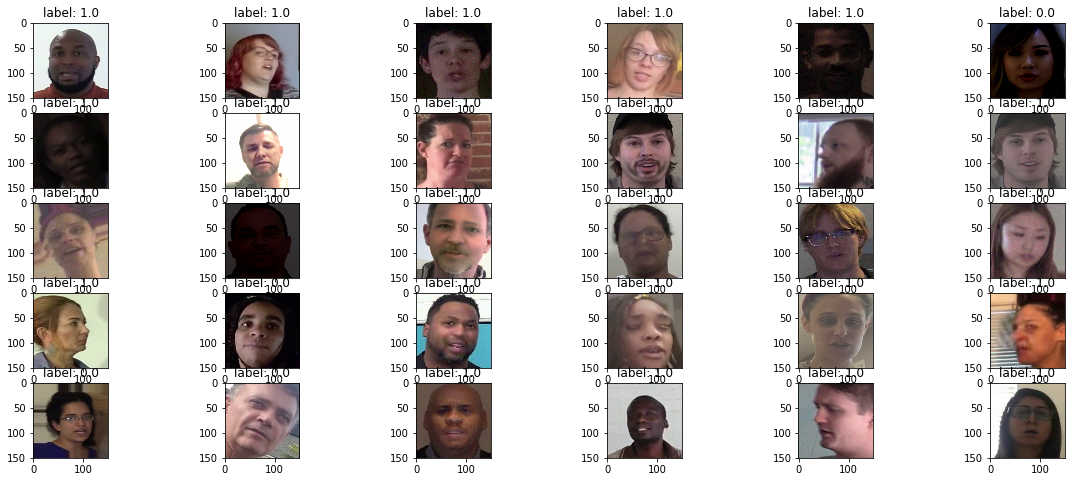

In [33]:
nrow, ncol = 5, 6
fig, axes = plt.subplots(nrow, ncol, figsize=(20, 8))
axes = axes.flatten()
for i, ax in enumerate(axes):
    image, label = train_dataset[i]
    image = np.rollaxis(image, 0, 3)
    image = image*std + mean
    image = np.clip(image, 0., 1.)
    ax.imshow(image)
    ax.set_title(f'label: {label}')

# Train

In [18]:
import gc

history = pd.DataFrame()
history2 = pd.DataFrame()

torch.cuda.empty_cache()
gc.collect()

best = 1e10
n_epochs = 20
batch_size = 64#BATCH SIZE CHANGED

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False, num_workers=0)

model = model.cuda()

optimizer = torch.optim.AdamW(model.parameters(), lr=0.001)

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=5, mode='min', factor=0.7, verbose=True, min_lr=1e-5)

for epoch in range(n_epochs):
    torch.cuda.empty_cache()
    gc.collect()
    train_model(epoch, optimizer, scheduler=None, history=history)
    loss = evaluate_model(epoch, scheduler=scheduler, history=history2)
    if loss < best:
        best = loss
        print(f'Saving best model...')
        torch.save(model.state_dict(), f'model2.pth')

Epoch 1/20, LR: 0.001000, Loss: 0.7097: 100%|██████████| 36/36 [00:13<00:00,  2.73it/s]


Dev loss: 0.6690, Acc: 0.487500, log_loss: 0.673126
Saving best model...


Epoch 2/20, LR: 0.001000, Loss: 0.5641: 100%|██████████| 36/36 [00:12<00:00,  2.96it/s]


Dev loss: 0.7757, Acc: 0.775000, log_loss: 0.509735


Epoch 3/20, LR: 0.001000, Loss: 0.4896: 100%|██████████| 36/36 [00:12<00:00,  2.99it/s]


Dev loss: 0.4710, Acc: 0.500000, log_loss: 0.533501
Saving best model...


Epoch 4/20, LR: 0.001000, Loss: 0.4540: 100%|██████████| 36/36 [00:12<00:00,  2.93it/s]


Dev loss: 0.4532, Acc: 0.800000, log_loss: 0.398308
Saving best model...


Epoch 5/20, LR: 0.001000, Loss: 0.4294: 100%|██████████| 36/36 [00:12<00:00,  2.84it/s]


Dev loss: 0.4089, Acc: 0.800000, log_loss: 0.339993
Saving best model...


Epoch 6/20, LR: 0.001000, Loss: 0.4033: 100%|██████████| 36/36 [00:12<00:00,  2.97it/s]


Dev loss: 0.5709, Acc: 0.868750, log_loss: 0.330743


Epoch 7/20, LR: 0.001000, Loss: 0.3955: 100%|██████████| 36/36 [00:12<00:00,  2.98it/s]


Dev loss: 0.4529, Acc: 0.500000, log_loss: 0.523786


Epoch 8/20, LR: 0.001000, Loss: 0.3670: 100%|██████████| 36/36 [00:12<00:00,  2.91it/s]


Dev loss: 0.6469, Acc: 0.500000, log_loss: 0.587457


Epoch 9/20, LR: 0.001000, Loss: 0.3453: 100%|██████████| 36/36 [00:12<00:00,  2.94it/s]


Dev loss: 0.3783, Acc: 0.700000, log_loss: 0.366500
Saving best model...


Epoch 10/20, LR: 0.001000, Loss: 0.3296: 100%|██████████| 36/36 [00:12<00:00,  2.84it/s]


Dev loss: 0.4737, Acc: 0.800000, log_loss: 0.298303


Epoch 11/20, LR: 0.001000, Loss: 0.3276: 100%|██████████| 36/36 [00:12<00:00,  2.93it/s]


Dev loss: 0.4046, Acc: 0.700000, log_loss: 0.374202


Epoch 12/20, LR: 0.001000, Loss: 0.3005: 100%|██████████| 36/36 [00:12<00:00,  3.00it/s]


Dev loss: 0.4714, Acc: 0.900000, log_loss: 0.254883


Epoch 13/20, LR: 0.001000, Loss: 0.2851: 100%|██████████| 36/36 [00:12<00:00,  2.95it/s]


Dev loss: 0.3438, Acc: 0.600000, log_loss: 0.363722
Saving best model...


Epoch 14/20, LR: 0.001000, Loss: 0.2466: 100%|██████████| 36/36 [00:13<00:00,  2.76it/s]


Dev loss: 0.4277, Acc: 0.700000, log_loss: 0.377712


Epoch 15/20, LR: 0.001000, Loss: 0.2365: 100%|██████████| 36/36 [00:11<00:00,  3.02it/s]


Dev loss: 0.3854, Acc: 0.700000, log_loss: 0.366995


Epoch 16/20, LR: 0.001000, Loss: 0.2532: 100%|██████████| 36/36 [00:12<00:00,  2.91it/s]


Dev loss: 0.3597, Acc: 0.600000, log_loss: 0.396534


Epoch 17/20, LR: 0.001000, Loss: 0.2327: 100%|██████████| 36/36 [00:12<00:00,  2.91it/s]


Dev loss: 0.4073, Acc: 0.800000, log_loss: 0.262673


Epoch 18/20, LR: 0.001000, Loss: 0.1922: 100%|██████████| 36/36 [00:12<00:00,  2.83it/s]


Dev loss: 0.3154, Acc: 0.800000, log_loss: 0.224847
Saving best model...


Epoch 19/20, LR: 0.001000, Loss: 0.1978: 100%|██████████| 36/36 [00:12<00:00,  2.86it/s]


Dev loss: 0.2963, Acc: 0.700000, log_loss: 0.276511
Saving best model...


Epoch 20/20, LR: 0.001000, Loss: 0.1861: 100%|██████████| 36/36 [00:12<00:00,  2.92it/s]


Dev loss: 0.5309, Acc: 0.500000, log_loss: 0.508465


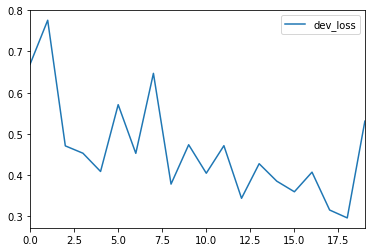

In [19]:
history2.plot()

In [ ]:
import torch
w = torch.rand(5)
w.requires_grad_()
print(w) 
s = w.sum() 
print(s)
s.backward()
print(w.grad) # tensor([1., 1., 1., 1., 1.])
s.backward()
print(w.grad) # tensor([2., 2., 2., 2., 2.])
s.backward()
print(w.grad) # tensor([3., 3., 3., 3., 3.])
s.backward()
print(w.grad) # tensor([4., 4., 4., 4., 4.])